<a href="https://colab.research.google.com/github/heehyeong/crime_analysis/blob/main/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_%EC%88%98%EB%8F%84%EA%B6%8C_%EB%B2%94%EC%A3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) 데이터 전처리

   ### 1-1. 데이터 불러오기

In [ ]:
#라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#데이터셋 사용
basic = pd.read_csv('C:/Users/Hyoung/Downloads/complete.csv', thousands=',', encoding='cp949', index_col=0)
basic= basic.drop(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1)

#그래프 사이즈 설정
plt.figure(figsize=(12, 3))

<Figure size 864x216 with 0 Axes>

<Figure size 864x216 with 0 Axes>

In [ ]:
basic.head()

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
종로구,25983,24,1715,145312,105,13,9409,8818,48705,3343
중구,22818,20,2447,122858,75,12,9277,8550,46203,3411
용산구,36881,13,2611,224145,108,15,14349,7838,62704,2969
성동구,42585,16,3829,287820,87,21,6536,6266,46164,2362
광진구,62301,13,3211,341112,63,22,12403,4908,37735,3601


### 1-2. 이상치 제거하기

In [ ]:
#이상치 찾는 함수
def calculerror(object):
    global basic
    q1= basic[object].quantile(0.25)
    q2= basic[object].quantile(0.5)
    q3= basic[object].quantile(0.75)
    iqr= q3-q1

    condition= basic[object]<q1-1.5*iqr
    condition= basic[object]>q3+1.5*iqr

    return basic[condition]

In [ ]:
calculerror('OPH')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
고양시,156505,19,6448,1080787,260,87,11522,35387,38882,27043
성남시,155774,25,5296,931760,194,72,15184,19808,47955,27066
수원시,199051,26,11354,1184754,146,99,35835,28775,41535,40659


In [ ]:
calculerror('police station')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,


In [ ]:
calculerror('cctv')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
수원시,199051,26,11354,1184754,146,99,35835,28775,41535,40659
용인시,130135,21,8483,1080027,329,105,16731,26665,45556,21502


In [ ]:
calculerror('population')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
고양시,156505,19,6448,1080787,260,87,11522,35387,38882,27043
수원시,199051,26,11354,1184754,146,99,35835,28775,41535,40659
용인시,130135,21,8483,1080027,329,105,16731,26665,45556,21502


In [ ]:
calculerror('park')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
용인시,130135,21,8483,1080027,329,105,16731,26665,45556,21502
평택시,110014,16,5271,557450,298,65,23168,21888,36172,25466
화성시,134248,18,7276,878879,440,98,37636,12990,43172,21374


In [ ]:
calculerror('elementary school')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
고양시,156505,19,6448,1080787,260,87,11522,35387,38882,27043
성남시,155774,25,5296,931760,194,72,15184,19808,47955,27066
수원시,199051,26,11354,1184754,146,99,35835,28775,41535,40659
용인시,130135,21,8483,1080027,329,105,16731,26665,45556,21502
화성시,134248,18,7276,878879,440,98,37636,12990,43172,21374


In [ ]:
calculerror('foreigner')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
수원시,199051,26,11354,1184754,146,99,35835,28775,41535,40659
시흥시,81425,11,4951,511900,194,46,32410,27737,32106,17726
안산시,115664,23,4615,654270,217,38,51270,13899,32021,26263
화성시,134248,18,7276,878879,440,98,37636,12990,43172,21374


In [ ]:
calculerror('streetlight')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
고양시,156505,19,6448,1080787,260,87,11522,35387,38882,27043
수원시,199051,26,11354,1184754,146,99,35835,28775,41535,40659
시흥시,81425,11,4951,511900,194,46,32410,27737,32106,17726
용인시,130135,21,8483,1080027,329,105,16731,26665,45556,21502


In [ ]:
calculerror('per capita income')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
용산구,36881,13,2611,224145,108,15,14349,7838,62704,2969
서초구,43942,21,4082,416285,181,24,3854,12588,71178,4601
강남구,68999,23,6871,533359,162,33,4761,14326,71198,7356


In [ ]:
calculerror('crime')

,OPH,police station,cctv,population,park,elementary school,foreigner,streetlight,per capita income,crime
district&city,,,,,,,,,,
고양시,156505,19,6448,1080787,260,87,11522,35387,38882,27043
부천시,120179,17,7546,809083,190,65,24405,16965,32720,28212
성남시,155774,25,5296,931760,194,72,15184,19808,47955,27066
수원시,199051,26,11354,1184754,146,99,35835,28775,41535,40659
안산시,115664,23,4615,654270,217,38,51270,13899,32021,26263
평택시,110014,16,5271,557450,298,65,23168,21888,36172,25466


# 2) 상관관계 분석

In [ ]:
#이상치 제거된 csv 파일 이용
basic_removed= pd.read_csv('C:/Users/Hyoung/Downloads/complete_removed.csv', thousands=',', encoding='cp949', index_col=0)

<AxesSubplot:xlabel='policestation', ylabel='elementaryschool'>

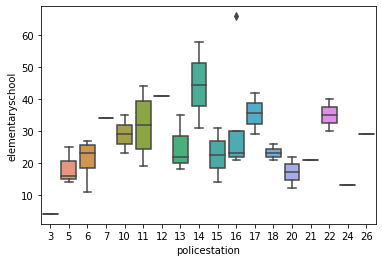

In [ ]:
sns.boxplot(data=basic_removed, x='policestation', y='elementaryschool')

<AxesSubplot:xlabel='elementaryschool', ylabel='crime'>

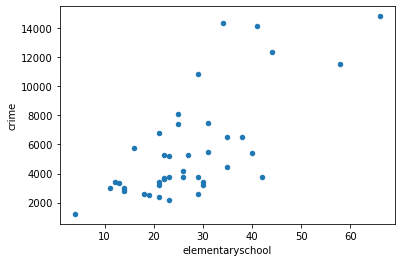

In [ ]:
basic_removed.plot(kind='scatter', x='elementaryschool', y='crime')

<AxesSubplot:xlabel='OPH', ylabel='crime'>

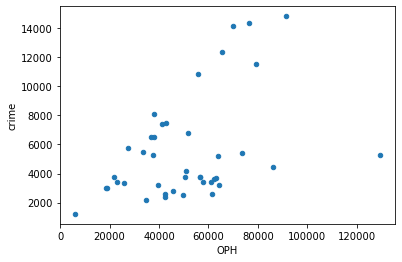

In [ ]:
basic_removed.plot(kind='scatter', x='OPH', y='crime')

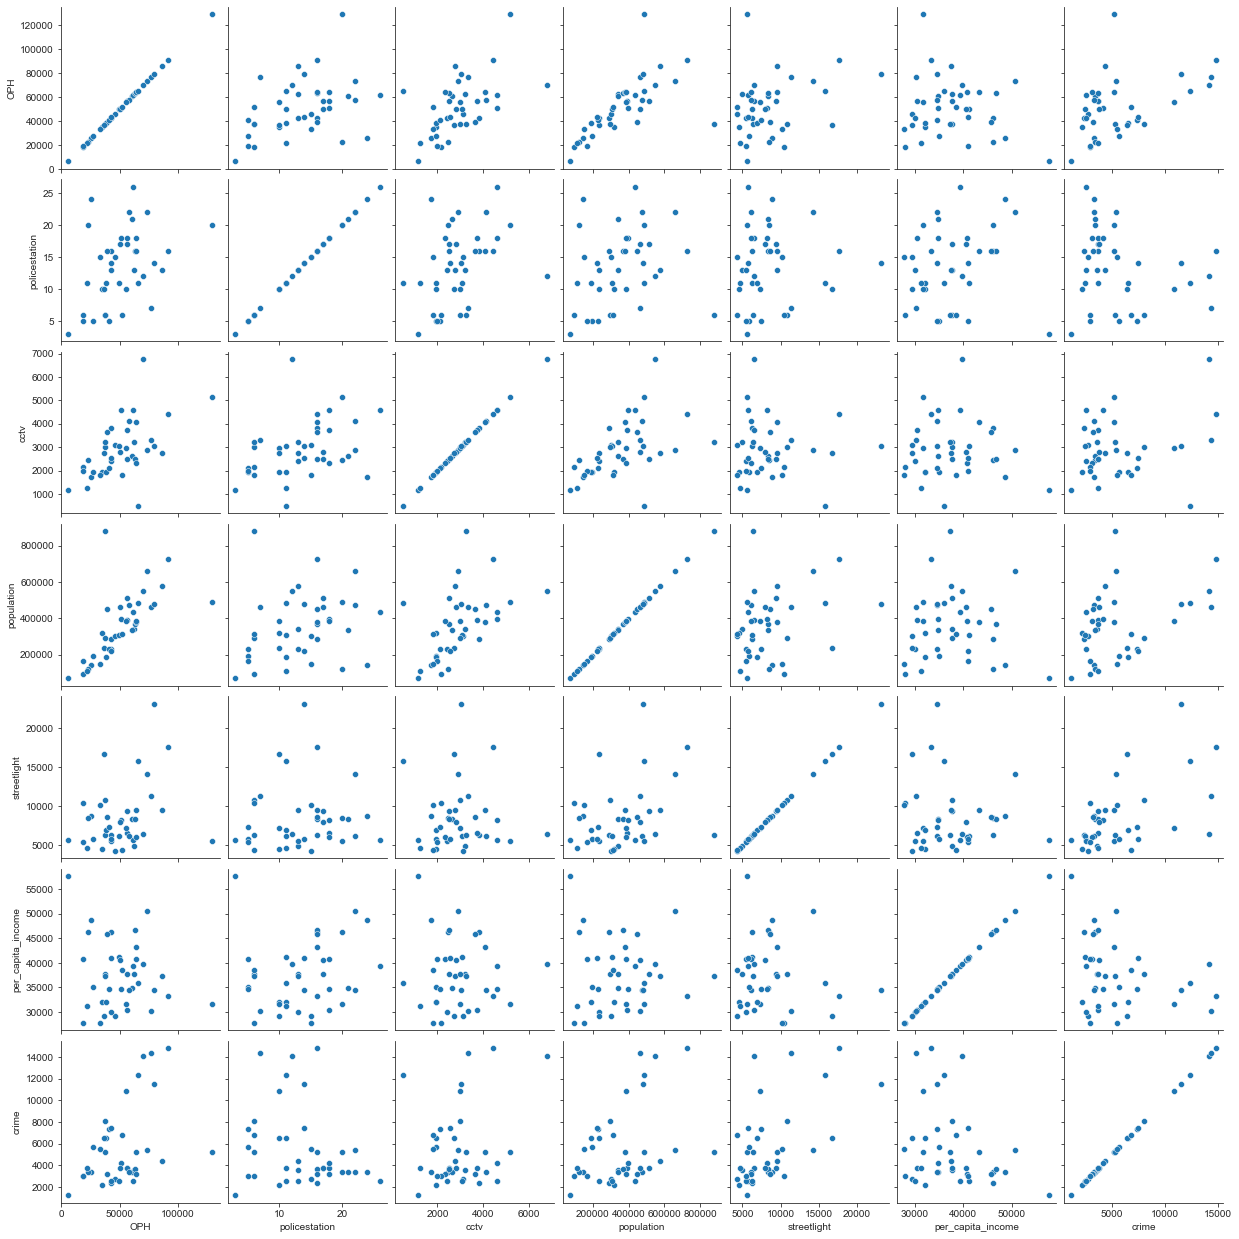

In [ ]:
sns.set_style('ticks')
data=basic_removed[['OPH','policestation','cctv','population','streetlight','per_capita_income','crime']]
sns.pairplot(data,diag_kind=None)
plt.show()

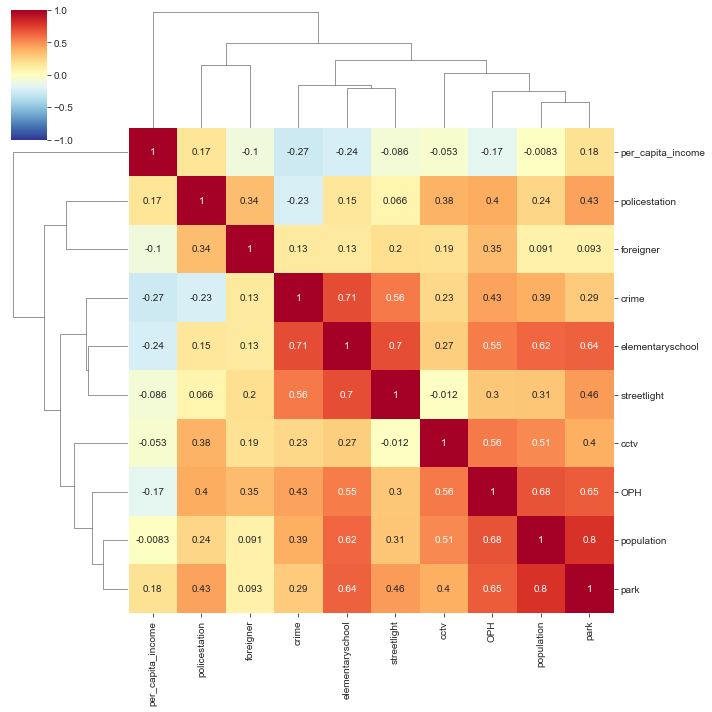

In [ ]:
df= basic_removed.corr()
sns.clustermap(df,
              annot = True,
              cmap= 'RdYlBu_r',
              vmin = -1, vmax =1,
              )

# 3) 다중 선형 회귀(Multiple Linear Regression)

### 다중회귀모델의 R-squared value & P-value

In [ ]:
import statsmodels.formula.api as sm

result = sm.ols(formula = 'crime ~ per_capita_income+foreigner+park+cctv+policestation+population+elementaryschool+streetlight+OPH', data = basic_removed).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     8.991
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.60e-06
Time:                        01:59:21   Log-Likelihood:                -366.59
No. Observations:                  41   AIC:                             753.2
Df Residuals:                      31   BIC:                             770.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -741.4101   2596.922     -0.285      0.777   -6037.868    4555.047
per_capita_income     0.0472      0.061      0.772      0.446      -0.077       0.172
foreigner             0.0400      0.071      0.563      0.578      -0.105       0.185
park                -22.8787     18.357     -1.246      0.222     -60.317      14.560
cctv                  0.5595      0.379      1.476      0.150      -0.214       1.333
policestation      -269.3343     76.123     -3.538      0.001    -424.589    -114.080
population           -0.0012      0.004     -0.309      0.759      -0.009       0.007
elementaryschool    197.3638     53.470      3.691      0.001      88.310     306.418
streetlight           0.1485      0.131      1.133      0.266      -0.119       0.416
OPH                   0.0455      0.025      1.825      0.078      -0.005       0.096
==============================================================================
Omnibus:                        6.800   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.260
Skew:                           0.956   Prob(JB):                       0.0437
Kurtosis:                       3.102   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4) 단순 선형 회귀(Simple Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
lin_reg = LinearRegression()

### 1-1. Population

In [ ]:
x=basic_removed['population']
y=basic_removed['crime']
lin_reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

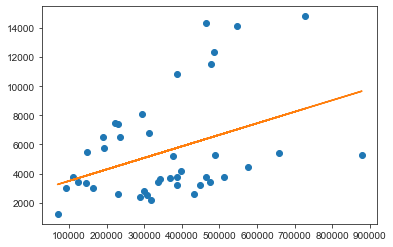

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lin_reg.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
print(f'y= {lin_reg.coef_}*x + {lin_reg.intercept_}')

y= [0.00792951]*x + 2693.632379209892


C:\Users\Hyoung\anaconda3\envs\aidemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='population', ylabel='Density'>

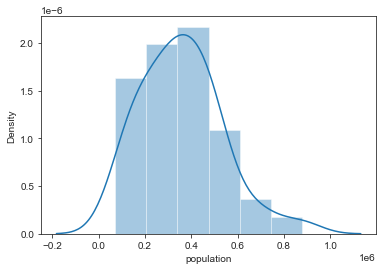

In [ ]:
sns.distplot(basic_removed['population'])

In [ ]:
result1_1 = sm.OLS(y, sm.add_constant(x)).fit()
result1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     7.136
Date:                Tue, 31 May 2022   Prob (F-statistic):             0.0110
Time:                        01:21:20   Log-Likelihood:                -389.47
No. Observations:                  41   AIC:                             782.9
Df Residuals:                      39   BIC:                             786.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2693.6324   1177.070      2.288      0.028     312.783    5074.482
population     0.0079      0.003      2.671      0.011       0.002       0.014
==============================================================================
Omnibus:                        6.097   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.949
Skew:                           0.925   Prob(JB):                       0.0511
Kurtosis:                       2.754   Cond. No.                     9.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-2. Park(the least R-squared value)

In [ ]:
x=basic_removed['park']
y=basic_removed['crime']
lin_reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

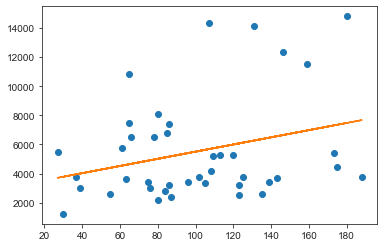

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lin_reg.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
print(f'y= {lin_reg.coef_}*x + {lin_reg.intercept_}')

y= [24.66551545]*x + 3036.6524088531487


C:\Users\Hyoung\anaconda3\envs\aidemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='park', ylabel='Density'>

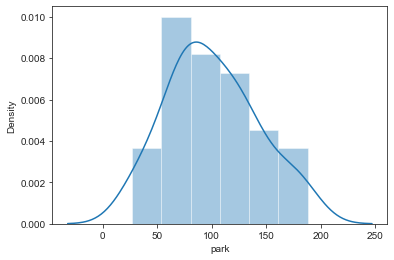

In [ ]:
sns.distplot(basic_removed['park'])

In [ ]:
result1_2 = sm.OLS(y, sm.add_constant(x)).fit()
result1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     3.511
Date:                Tue, 31 May 2022   Prob (F-statistic):             0.0685
Time:                        01:22:36   Log-Likelihood:                -391.14
No. Observations:                  41   AIC:                             786.3
Df Residuals:                      39   BIC:                             789.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3036.6524   1429.756      2.124      0.040     144.698    5928.607
park          24.6655     13.163      1.874      0.068      -1.960      51.291
==============================================================================
Omnibus:                        8.766   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.507
Skew:                           1.111   Prob(JB):                       0.0142
Kurtosis:                       3.213   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1-3. OPH(One person household)

In [ ]:
x=basic_removed['OPH']
y=basic_removed['crime']
lin_reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

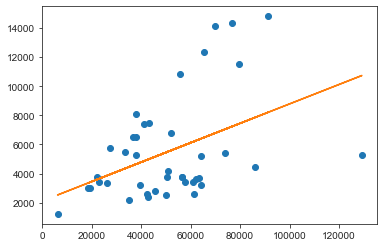

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lin_reg.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
print(f'y= {lin_reg.coef_}*x + {lin_reg.intercept_}')

y= [0.06675468]*x + 2111.907351114727


C:\Users\Hyoung\anaconda3\envs\aidemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OPH', ylabel='Density'>

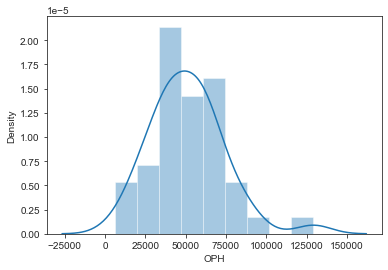

In [ ]:
sns.distplot(basic_removed['OPH'])

In [ ]:
result1_3 = sm.OLS(y, sm.add_constant(x)).fit()
result1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     8.926
Date:                Tue, 31 May 2022   Prob (F-statistic):            0.00484
Time:                        01:23:48   Log-Likelihood:                -388.68
No. Observations:                  41   AIC:                             781.4
Df Residuals:                      39   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2111.9074   1247.966      1.692      0.099    -412.343    4636.158
OPH            0.0668      0.022      2.988      0.005       0.022       0.112
==============================================================================
Omnibus:                        4.966   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.620
Skew:                           0.817   Prob(JB):                       0.0993
Kurtosis:                       2.812   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-4. Elementary School

In [ ]:
x=basic_removed['elementaryschool']
y=basic_removed['crime']
lin_reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

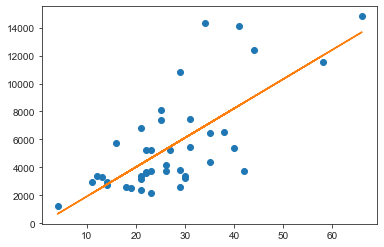

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lin_reg.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
print(f'y= {lin_reg.coef_}*x + {lin_reg.intercept_}')

y= [209.72122363]*x + -164.6897426421183


C:\Users\Hyoung\anaconda3\envs\aidemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='elementaryschool', ylabel='Density'>

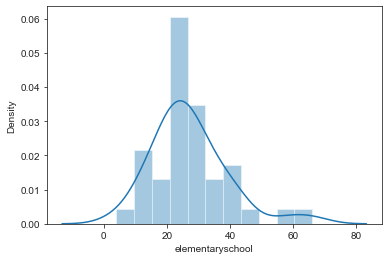

In [ ]:
sns.distplot(basic_removed['elementaryschool'])

In [ ]:
result1_4 = sm.OLS(y, sm.add_constant(x)).fit()
result1_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     39.76
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.95e-07
Time:                        01:25:44   Log-Likelihood:                -378.50
No. Observations:                  41   AIC:                             761.0
Df Residuals:                      39   BIC:                             764.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -164.6897    984.365     -0.167      0.868   -2155.755    1826.376
elementaryschool   209.7212     33.260      6.306      0.000     142.447     276.996
==============================================================================
Omnibus:                        7.748   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.508
Skew:                           0.863   Prob(JB):                       0.0386
Kurtosis:                       3.913   Cond. No.                         73.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1-5. Street Light

In [ ]:
x=basic_removed['streetlight']
y=basic_removed['crime']
lin_reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

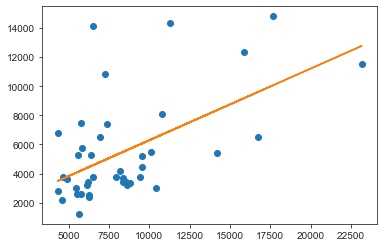

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lin_reg.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
print(f'y= {lin_reg.coef_}*x + {lin_reg.intercept_}')

y= [0.49205606]*x + 1369.551273700693


C:\Users\Hyoung\anaconda3\envs\aidemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='streetlight', ylabel='Density'>

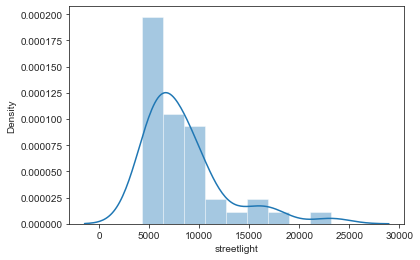

In [ ]:
sns.distplot(basic_removed['streetlight'])

In [ ]:
result1_5 = sm.OLS(y, sm.add_constant(x)).fit()
result1_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     17.64
Date:                Tue, 31 May 2022   Prob (F-statistic):           0.000150
Time:                        01:26:40   Log-Likelihood:                -385.26
No. Observations:                  41   AIC:                             774.5
Df Residuals:                      39   BIC:                             777.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1369.5513   1092.466      1.254      0.217    -840.169    3579.272
streetlight     0.4921      0.117      4.200      0.000       0.255       0.729
==============================================================================
Omnibus:                       17.342   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.385
Skew:                           1.477   Prob(JB):                     3.74e-05
Kurtosis:                       4.791   Cond. No.                     2.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-6. Police Station

In [ ]:
x=basic_removed['policestation']
y=basic_removed['crime']
lin_reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

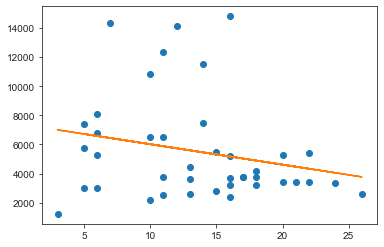

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lin_reg.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
print(f'y= {lin_reg.coef_}*x + {lin_reg.intercept_}')

y= [-140.62832296]*x + 7421.871201025266


C:\Users\Hyoung\anaconda3\envs\aidemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policestation', ylabel='Density'>

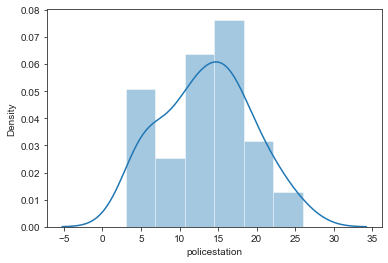

In [ ]:
sns.distplot(basic_removed['policestation'])

In [ ]:
result1_6 = sm.OLS(y, sm.add_constant(x)).fit()
result1_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.142
Date:                Tue, 31 May 2022   Prob (F-statistic):              0.151
Time:                        01:30:35   Log-Likelihood:                -391.81
No. Observations:                  41   AIC:                             787.6
Df Residuals:                      39   BIC:                             791.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7421.8712   1411.242      5.259      0.000    4567.364    1.03e+04
policestation  -140.6283     96.083     -1.464      0.151    -334.974      53.717
==============================================================================
Omnibus:                       13.314   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.661
Skew:                           1.288   Prob(JB):                      0.00108
Kurtosis:                       4.167   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1-7. CCTV

In [ ]:
x=basic_removed['cctv']
y=basic_removed['crime']
lin_reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

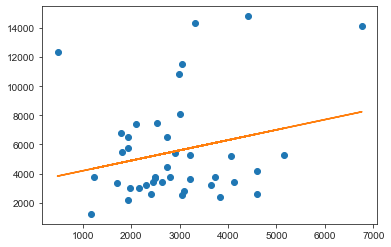

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lin_reg.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
print(f'y= {lin_reg.coef_}*x + {lin_reg.intercept_}')

y= [0.70404299]*x + 3481.5849185768966


C:\Users\Hyoung\anaconda3\envs\aidemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cctv', ylabel='Density'>

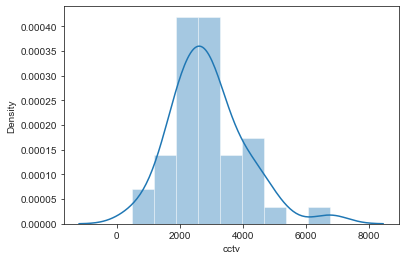

In [ ]:
sns.distplot(basic_removed['cctv'])

In [ ]:
result1_7 = sm.OLS(y, sm.add_constant(x)).fit()
result1_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.230
Date:                Tue, 31 May 2022   Prob (F-statistic):              0.143
Time:                        01:32:50   Log-Likelihood:                -391.77
No. Observations:                  41   AIC:                             787.5
Df Residuals:                      39   BIC:                             791.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3481.5849   1469.396      2.369      0.023     509.451    6453.718
cctv           0.7040      0.471      1.493      0.143      -0.250       1.658
==============================================================================
Omnibus:                       11.048   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.014
Skew:                           1.240   Prob(JB):                      0.00406
Kurtosis:                       3.545   Cond. No.                     8.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-8. Foreigner

In [ ]:
x=basic_removed['foreigner']
y=basic_removed['crime']
lin_reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

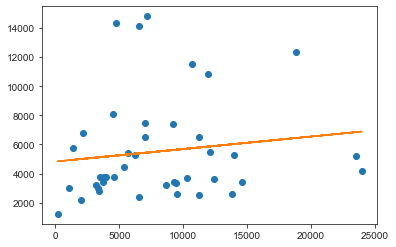

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lin_reg.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
print(f'y= {lin_reg.coef_}*x + {lin_reg.intercept_}')

y= [0.0860797]*x + 4822.102633351059


C:\Users\Hyoung\anaconda3\envs\aidemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='foreigner', ylabel='Density'>

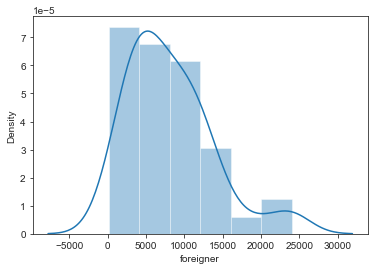

In [ ]:
sns.distplot(basic_removed['foreigner'])

In [ ]:
result1_8 = sm.OLS(y, sm.add_constant(x)).fit()
result1_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7185
Date:                Tue, 31 May 2022   Prob (F-statistic):              0.402
Time:                        01:34:47   Log-Likelihood:                -392.54
No. Observations:                  41   AIC:                             789.1
Df Residuals:                      39   BIC:                             792.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4822.1026    992.559      4.858      0.000    2814.463    6829.742
foreigner      0.0861      0.102      0.848      0.402      -0.119       0.291
==============================================================================
Omnibus:                       14.823   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.038
Skew:                           1.432   Prob(JB):                     0.000329
Kurtosis:                       4.091   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-9. Per Capita Income - 1인당 소득

In [ ]:
x=basic_removed['per_capita_income']
y=basic_removed['crime']
lin_reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

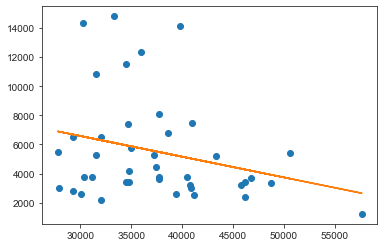

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lin_reg.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
print(f'y= {lin_reg.coef_}*x + {lin_reg.intercept_}')

y= [-0.14244607]*x + 10852.063946438022


C:\Users\Hyoung\anaconda3\envs\aidemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='per_capita_income', ylabel='Density'>

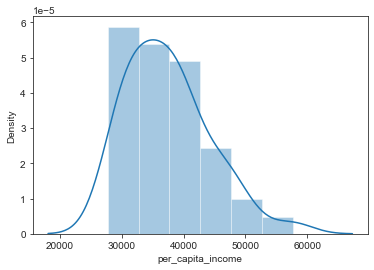

In [ ]:
sns.distplot(basic_removed['per_capita_income'])

In [ ]:
result1_8 = sm.OLS(y, sm.add_constant(x)).fit()
result1_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.085
Date:                Tue, 31 May 2022   Prob (F-statistic):             0.0869
Time:                        01:37:57   Log-Likelihood:                -391.35
No. Observations:                  41   AIC:                             786.7
Df Residuals:                      39   BIC:                             790.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.085e+04   3084.562      3.518      0.001    4612.949    1.71e+04
per_capita_income    -0.1424      0.081     -1.756      0.087      -0.306       0.022
==============================================================================
Omnibus:                       12.474   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.628
Skew:                           1.290   Prob(JB):                      0.00181
Kurtosis:                       3.858   Cond. No.                     2.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5) 다중 선형 회귀 - 재모델링

In [ ]:
#p-value가 0.05보다 작은 유의미한 독립변수들만 모아서 다시 선형회귀분석
#Elementary School-Street Light/ OPH-Population 간의 상관계수가 높은 편이라, 각각 하나씩 배제하고 계산 --> p-value가 작아지는 것 확인!

re_result = sm.ols(formula = 'crime ~ elementaryschool+OPH', data = basic_removed).fit()
re_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     19.57
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.44e-06
Time:                        02:03:21   Log-Likelihood:                -378.40
No. Observations:                  41   AIC:                             762.8
Df Residuals:                      38   BIC:                             767.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -376.1713   1103.442     -0.341      0.735   -2609.973    1857.630
elementaryschool   199.9726     40.180      4.977      0.000     118.632     281.313
OPH                  0.0093      0.021      0.443      0.660      -0.033       0.052
==============================================================================
Omnibus:                        6.964   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                5.672
Skew:                           0.829   Prob(JB):                       0.0587
Kurtosis:                       3.756   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 참고) 정규성(Normality) 검정

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import norm
from statsmodels.formula.api import ols

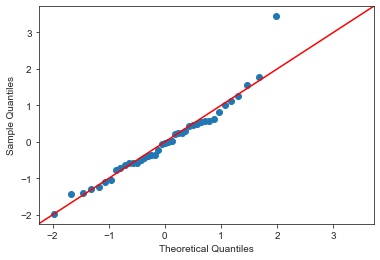

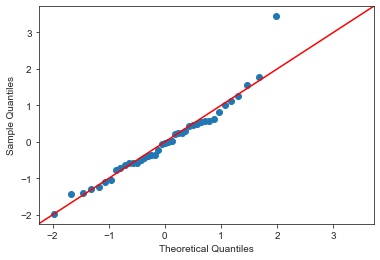

In [ ]:
sm.qqplot(basic_removed['OPH'], fit=True, line='45')

## 참고) 예측값과 비교(train 이용)

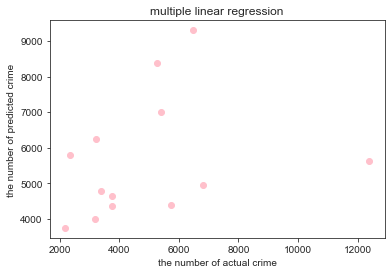

In [ ]:
from sklearn.model_selection import train_test_split
x = basic_removed[['per_capita_income','foreigner','park','cctv', 'policestation','population', 'elementaryschool', 'streetlight', 'OPH']].values
y = basic_removed[['crime']]
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.7, test_size=0.3)

mlr = LinearRegression()
mlr.fit(x_train,y_train)
region_pre = [[45000, 9500, 80, 2500, 18, 25000,18,7500,35000]]
region_pred = mlr.predict(region_pre)
y_predict = mlr.predict(x_test)

plt.scatter(y_test,y_predict,c= 'pink', alpha=1.0)
plt.xlabel("the number of actual crime")
plt.ylabel("the number of predicted crime")
plt.title("multiple linear regression")
plt.show()